In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.patheffects as path_effects
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import shap

import string

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
## DATA

CLAIX_DATASET_PATH = r"/work/qi190786/transfer-learning/2021-dmytro-povaliaiev/sourcecode/visualization/data/Claix_Transfer_Learning_Cross-Val_Final_Error_Rates.csv"

CLAIX_FROM_SCRATCH_DATASET_PATH = r"/work/qi190786/transfer-learning/2021-dmytro-povaliaiev/sourcecode/visualization/data/Claix_Training_Model_From_Scratch_Final_Error_Rates.csv"

CLAIX_BASELINE_RANDOM_MODEL_PATH = r"/work/qi190786/transfer-learning/2021-dmytro-povaliaiev/sourcecode/visualization/data/Claix_Baseline_Random_Model.csv"

BW_DATASET_PATH = r"/work/qi190786/transfer-learning/2021-dmytro-povaliaiev/sourcecode/visualization/data/Blue_Waters_Cross-Val_Final_Error_Rates.csv"

BW_BASELINE_MODEL_PATH = r"/work/qi190786/transfer-learning/2021-dmytro-povaliaiev/sourcecode/visualization/data/Blue_Waters_Baseline_Random_Model.csv"

In [3]:
fontsize_val = 12

In [4]:
global_rcParams = {
    "font.size": fontsize_val,
    "legend.fontsize" : fontsize_val,
    "axes.titlesize": fontsize_val,
    "axes.labelsize" : fontsize_val
}

In [5]:
cm = 1/2.54

In [6]:
# Apply the default Seaborn theme
sns.set_theme(rc=global_rcParams)

In [7]:
sns.set_context("notebook")

In [8]:
plt.rcParams.update(global_rcParams)

In [9]:
plt.rcParams['figure.dpi'] = 300

In [10]:
CLAIX_BANDWIDTH_MEAN = 1764.640817
BW_BANDWIDTH_MEAN = 162.077947

### Data Checking 

In [11]:
claix_cross_val_df = pd.read_csv(CLAIX_DATASET_PATH)
len(claix_cross_val_df)

20

In [12]:
claix_from_scratch_cross_val_df = pd.read_csv(CLAIX_FROM_SCRATCH_DATASET_PATH)
len(claix_from_scratch_cross_val_df)

10

In [13]:
claix_baseline_random_model_df = pd.read_csv(CLAIX_BASELINE_RANDOM_MODEL_PATH)
len(claix_baseline_random_model_df)

10

In [14]:
blue_waters_cross_val_errors_df = pd.read_csv(BW_DATASET_PATH)
len(blue_waters_cross_val_errors_df)

20

In [15]:
blue_waters_baseline_random_model_df = pd.read_csv(BW_BASELINE_MODEL_PATH)
len(blue_waters_baseline_random_model_df)

10

### Data Visualisation Prep

In [16]:
def calc_test_loss_scaled_by_bandwidth_mean(errors_per_fold_df, bandwidth_mean):
    errors_per_fold_df["scaled_test_loss"] = errors_per_fold_df["test_loss"] / bandwidth_mean
    return errors_per_fold_df

In [17]:
blue_waters_cross_val_errors_df = calc_test_loss_scaled_by_bandwidth_mean(blue_waters_cross_val_errors_df,
                                                                          BW_BANDWIDTH_MEAN)
blue_waters_cross_val_errors_df

,nprocs_filter,kfold_seed,test_loss,scaled_test_loss
0,False,728841181,18.603349,0.114780
1,False,879843057,19.293462,0.119038
2,False,1155483495,18.552807,0.114468
3,False,1159944860,19.346335,0.119364
4,False,1309364699,19.135887,0.118066
5,False,1379701443,18.984217,0.117130
6,False,1392436736,18.534519,0.114356
7,False,1474235857,18.511819,0.114216
8,False,1801054430,19.001011,0.117234
9,False,1812549005,18.153162,0.112003


In [18]:
blue_waters_cross_val_errors_df.loc[blue_waters_cross_val_errors_df["nprocs_filter"] == False, "test_loss"].describe()

count    10.000000
mean     18.811657
std       0.394334
min      18.153162
25%      18.539091
50%      18.793783
75%      19.102168
max      19.346335
Name: test_loss, dtype: float64

In [19]:
blue_waters_cross_val_errors_df.loc[blue_waters_cross_val_errors_df["nprocs_filter"] == True, "test_loss"].describe()

count    10.000000
mean      5.530041
std       0.461410
min       5.129502
25%       5.193875
50%       5.473550
75%       5.683554
max       6.659471
Name: test_loss, dtype: float64

In [20]:
blue_waters_cross_val_errors_df.loc[blue_waters_cross_val_errors_df["nprocs_filter"] == True, "scaled_test_loss"].describe()

count    10.000000
mean      0.034120
std       0.002847
min       0.031648
25%       0.032046
50%       0.033771
75%       0.035067
max       0.041088
Name: scaled_test_loss, dtype: float64

In [21]:
blue_waters_baseline_random_model_df = calc_test_loss_scaled_by_bandwidth_mean(blue_waters_baseline_random_model_df,
                                                                          BW_BANDWIDTH_MEAN)
blue_waters_baseline_random_model_df

,nprocs_filter,test_loss,kfold_seed,scaled_test_loss
0,False,155.229748,1812549005,0.957747
1,False,155.449274,1801054430,0.959102
2,False,155.405450,1474235857,0.958832
3,False,155.390289,1392436736,0.958738
4,False,155.408333,1379701443,0.958849
5,False,155.357678,1309364699,0.958537
6,False,155.373657,1159944860,0.958635
7,False,155.483298,1155483495,0.959312
8,False,155.504190,879843057,0.959441
9,False,155.379211,728841181,0.958670


In [22]:
blue_waters_baseline_random_model_df["test_loss"].describe()

count     10.000000
mean     155.398113
std        0.076218
min      155.229748
25%      155.375046
50%      155.397870
75%      155.439038
max      155.504190
Name: test_loss, dtype: float64

In [23]:
blue_waters_baseline_random_model_df["scaled_test_loss"].describe()

count    10.000000
mean      0.958786
std       0.000470
min       0.957747
25%       0.958644
50%       0.958785
75%       0.959039
max       0.959441
Name: scaled_test_loss, dtype: float64

In [24]:
claix_cross_val_df = calc_test_loss_scaled_by_bandwidth_mean(claix_cross_val_df, CLAIX_BANDWIDTH_MEAN)
claix_cross_val_df

,nprocs_filter,kfold_seed,test_loss,scaled_test_loss
0,False,728841181,446.546107,0.253052
1,False,879843057,383.984279,0.217599
2,False,1155483495,414.940024,0.235141
3,False,1159944860,322.573815,0.182799
4,False,1309364699,450.844326,0.255488
5,False,1379701443,249.239391,0.141241
6,False,1392436736,311.929039,0.176766
7,False,1474235857,303.105098,0.171766
8,False,1801054430,393.185193,0.222813
9,False,1812549005,282.866293,0.160297


In [25]:
claix_cross_val_df.loc[claix_cross_val_df["nprocs_filter"] == False, "test_loss"].describe()

count     10.000000
mean     355.921356
std       71.053629
min      249.239391
25%      305.311083
50%      353.279047
75%      409.501317
max      450.844326
Name: test_loss, dtype: float64

In [26]:
claix_cross_val_df.loc[claix_cross_val_df["nprocs_filter"] == True, "test_loss"].describe()

count     10.000000
mean     157.444370
std       62.080937
min       73.400813
25%      115.238054
50%      140.415690
75%      201.941095
max      277.693023
Name: test_loss, dtype: float64

In [27]:
claix_cross_val_df.loc[claix_cross_val_df["nprocs_filter"] == True, "scaled_test_loss"].describe()

count    10.000000
mean      0.089222
std       0.035180
min       0.041595
25%       0.065304
50%       0.079572
75%       0.114438
max       0.157365
Name: scaled_test_loss, dtype: float64

In [28]:
claix_cross_val_df.loc[claix_cross_val_df["nprocs_filter"] == False, "scaled_test_loss"].mean() /\
claix_cross_val_df.loc[claix_cross_val_df["nprocs_filter"] == True, "scaled_test_loss"].mean()

2.260616596257447

In [29]:
claix_from_scratch_cross_val_df = calc_test_loss_scaled_by_bandwidth_mean(claix_from_scratch_cross_val_df, CLAIX_BANDWIDTH_MEAN)
claix_from_scratch_cross_val_df

,nprocs_filter,test_loss,kfold_seed,scaled_test_loss
0,False,391.809976,1812549005,0.222034
1,False,402.600131,1801054430,0.228148
2,False,400.635429,1474235857,0.227035
3,False,386.621233,1392436736,0.219093
4,False,393.957878,1379701443,0.223251
5,False,382.983468,1309364699,0.217032
6,False,401.597984,1159944860,0.227581
7,False,402.572623,1155483495,0.228133
8,False,393.547108,879843057,0.223018
9,False,390.356436,728841181,0.221210


In [30]:
claix_from_scratch_cross_val_df["test_loss"].describe()

count     10.000000
mean     394.668226
std        6.982788
min      382.983468
25%      390.719821
50%      393.752493
75%      401.357345
max      402.600131
Name: test_loss, dtype: float64

In [31]:
claix_from_scratch_cross_val_df["scaled_test_loss"].describe()

count    10.000000
mean      0.223654
std       0.003957
min       0.217032
25%       0.221416
50%       0.223135
75%       0.227444
max       0.228148
Name: scaled_test_loss, dtype: float64

In [32]:
claix_baseline_random_model_df = calc_test_loss_scaled_by_bandwidth_mean(claix_baseline_random_model_df, CLAIX_BANDWIDTH_MEAN)
claix_baseline_random_model_df

,nprocs_filter,test_loss,kfold_seed,scaled_test_loss
0,False,254.795383,1812549005,0.144389
1,False,239.807034,1801054430,0.135896
2,False,249.649851,1474235857,0.141473
3,False,283.607111,1392436736,0.160717
4,False,232.116211,1379701443,0.131537
5,False,213.336755,1309364699,0.120895
6,False,278.319879,1159944860,0.157720
7,False,260.833197,1155483495,0.147811
8,False,251.544302,879843057,0.142547
9,False,283.531366,728841181,0.160674


In [33]:
claix_baseline_random_model_df["test_loss"].mean()

254.75410890000003

In [34]:
claix_baseline_random_model_df["scaled_test_loss"].mean()

0.1443659845367841

In [35]:
num_to_letter_mapping = dict(enumerate(string.ascii_uppercase, 1))


def pretty_format_errors_per_fold(errors_per_fold_df):
    vis_errors_per_fold_df = pd.DataFrame()
    # Pretty-print the nprocs filtered/non-filtered info
    vis_errors_per_fold_df["Variant"] = np.where(errors_per_fold_df["nprocs_filter"] == True,
                                                          "Limited number of processes variant", "Full dataset variant")
    vis_errors_per_fold_df["5-fold seed"] = errors_per_fold_df["kfold_seed"]

    # Assign a number and a letter code to each seed to enable better X-axis labels
    vis_errors_per_fold_df["5-fold cross-validation"] = vis_errors_per_fold_df.groupby("5-fold seed").ngroup() + 1
    vis_errors_per_fold_df["Random seed for 5-fold cross-validation"] = vis_errors_per_fold_df[
        "5-fold cross-validation"].map(num_to_letter_mapping)

    vis_errors_per_fold_df["Final loss"] = errors_per_fold_df["test_loss"]
    vis_errors_per_fold_df["Final error (as % of bandwidth mean)"] = errors_per_fold_df["scaled_test_loss"] * 100
    return vis_errors_per_fold_df

In [36]:
vis_bw_cross_val_errors_df = pretty_format_errors_per_fold(blue_waters_cross_val_errors_df)
vis_bw_cross_val_errors_df

,Variant,5-fold seed,5-fold cross-validation,Random seed for 5-fold cross-validation,Final loss,Final error (as % of bandwidth mean)
0,Full dataset variant,728841181,1,A,18.603349,11.478026
1,Full dataset variant,879843057,2,B,19.293462,11.903817
2,Full dataset variant,1155483495,3,C,18.552807,11.446842
3,Full dataset variant,1159944860,4,D,19.346335,11.936439
4,Full dataset variant,1309364699,5,E,19.135887,11.806595
5,Full dataset variant,1379701443,6,F,18.984217,11.713017
6,Full dataset variant,1392436736,7,G,18.534519,11.435559
7,Full dataset variant,1474235857,8,H,18.511819,11.421554
8,Full dataset variant,1801054430,9,I,19.001011,11.723378
9,Full dataset variant,1812549005,10,J,18.153162,11.200266


In [37]:
vis_blue_waters_baseline_random_model_df = pretty_format_errors_per_fold(blue_waters_baseline_random_model_df)
vis_blue_waters_baseline_random_model_df["Variant"] = "Baseline - random guess in the IQR range"
vis_blue_waters_baseline_random_model_df

,Variant,5-fold seed,5-fold cross-validation,Random seed for 5-fold cross-validation,Final loss,Final error (as % of bandwidth mean)
0,Baseline - random guess in the IQR range,1812549005,10,J,155.229748,95.774750
1,Baseline - random guess in the IQR range,1801054430,9,I,155.449274,95.910194
2,Baseline - random guess in the IQR range,1474235857,8,H,155.405450,95.883156
3,Baseline - random guess in the IQR range,1392436736,7,G,155.390289,95.873802
4,Baseline - random guess in the IQR range,1379701443,6,F,155.408333,95.884934
5,Baseline - random guess in the IQR range,1309364699,5,E,155.357678,95.853681
6,Baseline - random guess in the IQR range,1159944860,4,D,155.373657,95.863540
7,Baseline - random guess in the IQR range,1155483495,3,C,155.483298,95.931187
8,Baseline - random guess in the IQR range,879843057,2,B,155.504190,95.944077
9,Baseline - random guess in the IQR range,728841181,1,A,155.379211,95.866967


In [38]:
vis_bw_errors_df =pd.concat([vis_bw_cross_val_errors_df, vis_blue_waters_baseline_random_model_df], ignore_index=True)
vis_bw_errors_df

,Variant,5-fold seed,5-fold cross-validation,Random seed for 5-fold cross-validation,Final loss,Final error (as % of bandwidth mean)
0,Full dataset variant,728841181,1,A,18.603349,11.478026
1,Full dataset variant,879843057,2,B,19.293462,11.903817
2,Full dataset variant,1155483495,3,C,18.552807,11.446842
3,Full dataset variant,1159944860,4,D,19.346335,11.936439
4,Full dataset variant,1309364699,5,E,19.135887,11.806595
5,Full dataset variant,1379701443,6,F,18.984217,11.713017
6,Full dataset variant,1392436736,7,G,18.534519,11.435559
7,Full dataset variant,1474235857,8,H,18.511819,11.421554
8,Full dataset variant,1801054430,9,I,19.001011,11.723378
9,Full dataset variant,1812549005,10,J,18.153162,11.200266


In [39]:
vis_claix_errors_df = pretty_format_errors_per_fold(claix_cross_val_df)
vis_claix_errors_df

,Variant,5-fold seed,5-fold cross-validation,Random seed for 5-fold cross-validation,Final loss,Final error (as % of bandwidth mean)
0,Full dataset variant,728841181,1,A,446.546107,25.305212
1,Full dataset variant,879843057,2,B,383.984279,21.759911
2,Full dataset variant,1155483495,3,C,414.940024,23.514135
3,Full dataset variant,1159944860,4,D,322.573815,18.279857
4,Full dataset variant,1309364699,5,E,450.844326,25.548787
5,Full dataset variant,1379701443,6,F,249.239391,14.124086
6,Full dataset variant,1392436736,7,G,311.929039,17.676631
7,Full dataset variant,1474235857,8,H,303.105098,17.176589
8,Full dataset variant,1801054430,9,I,393.185193,22.281316
9,Full dataset variant,1812549005,10,J,282.866293,16.029681


In [40]:
vis_claix_from_scratch_errors_df = pretty_format_errors_per_fold(claix_from_scratch_cross_val_df)
vis_claix_from_scratch_errors_df["Variant"] = "Baseline - no initial training"
vis_claix_from_scratch_errors_df

,Variant,5-fold seed,5-fold cross-validation,Random seed for 5-fold cross-validation,Final loss,Final error (as % of bandwidth mean)
0,Baseline - no initial training,1812549005,10,J,391.809976,22.203384
1,Baseline - no initial training,1801054430,9,I,402.600131,22.814849
2,Baseline - no initial training,1474235857,8,H,400.635429,22.703511
3,Baseline - no initial training,1392436736,7,G,386.621233,21.909344
4,Baseline - no initial training,1379701443,6,F,393.957878,22.325103
5,Baseline - no initial training,1309364699,5,E,382.983468,21.703197
6,Baseline - no initial training,1159944860,4,D,401.597984,22.758058
7,Baseline - no initial training,1155483495,3,C,402.572623,22.813290
8,Baseline - no initial training,879843057,2,B,393.547108,22.301825
9,Baseline - no initial training,728841181,1,A,390.356436,22.121014


In [41]:
vis_claix_baseline_random_model_df = pretty_format_errors_per_fold(claix_baseline_random_model_df)
vis_claix_baseline_random_model_df["Variant"] = "Baseline - random guess in the IQR range"
vis_claix_baseline_random_model_df

,Variant,5-fold seed,5-fold cross-validation,Random seed for 5-fold cross-validation,Final loss,Final error (as % of bandwidth mean)
0,Baseline - random guess in the IQR range,1812549005,10,J,254.795383,14.438937
1,Baseline - random guess in the IQR range,1801054430,9,I,239.807034,13.589566
2,Baseline - random guess in the IQR range,1474235857,8,H,249.649851,14.147346
3,Baseline - random guess in the IQR range,1392436736,7,G,283.607111,16.071662
4,Baseline - random guess in the IQR range,1379701443,6,F,232.116211,13.153737
5,Baseline - random guess in the IQR range,1309364699,5,E,213.336755,12.089529
6,Baseline - random guess in the IQR range,1159944860,4,D,278.319879,15.772041
7,Baseline - random guess in the IQR range,1155483495,3,C,260.833197,14.781093
8,Baseline - random guess in the IQR range,879843057,2,B,251.544302,14.254703
9,Baseline - random guess in the IQR range,728841181,1,A,283.531366,16.067370


In [42]:
vis_claix_combined_errors_df = pd.concat([vis_claix_errors_df, vis_claix_from_scratch_errors_df, vis_claix_baseline_random_model_df], axis=0, ignore_index=True)
vis_claix_combined_errors_df

,Variant,5-fold seed,5-fold cross-validation,Random seed for 5-fold cross-validation,Final loss,Final error (as % of bandwidth mean)
0,Full dataset variant,728841181,1,A,446.546107,25.305212
1,Full dataset variant,879843057,2,B,383.984279,21.759911
2,Full dataset variant,1155483495,3,C,414.940024,23.514135
3,Full dataset variant,1159944860,4,D,322.573815,18.279857
4,Full dataset variant,1309364699,5,E,450.844326,25.548787
5,Full dataset variant,1379701443,6,F,249.239391,14.124086
6,Full dataset variant,1392436736,7,G,311.929039,17.676631
7,Full dataset variant,1474235857,8,H,303.105098,17.176589
8,Full dataset variant,1801054430,9,I,393.185193,22.281316
9,Full dataset variant,1812549005,10,J,282.866293,16.029681


In [43]:
# Needed for the scatterplot & other seaborn plots to work later on
vis_bw_errors_df["Cluster"] = "Blue Waters"
vis_claix_combined_errors_df["Cluster"] = "CLAIX"

In [44]:
vis_all_errors_df = pd.concat([vis_bw_errors_df, vis_claix_combined_errors_df], ignore_index=True)
vis_all_errors_df

,Variant,5-fold seed,5-fold cross-validation,Random seed for 5-fold cross-validation,Final loss,Final error (as % of bandwidth mean),Cluster
0,Full dataset variant,728841181,1,A,18.603349,11.478026,Blue Waters
1,Full dataset variant,879843057,2,B,19.293462,11.903817,Blue Waters
2,Full dataset variant,1155483495,3,C,18.552807,11.446842,Blue Waters
3,Full dataset variant,1159944860,4,D,19.346335,11.936439,Blue Waters
4,Full dataset variant,1309364699,5,E,19.135887,11.806595,Blue Waters
...,...,...,...,...,...,...,...
65,Baseline - random guess in the IQR range,1309364699,5,E,213.336755,12.089529,CLAIX
66,Baseline - random guess in the IQR range,1159944860,4,D,278.319879,15.772041,CLAIX
67,Baseline - random guess in the IQR range,1155483495,3,C,260.833197,14.781093,CLAIX
68,Baseline - random guess in the IQR range,879843057,2,B,251.544302,14.254703,CLAIX


In [45]:
vis_claix_combined_errors_df.loc[vis_claix_combined_errors_df["Variant"] == "Baseline - no initial training",
                              "Final error (as % of bandwidth mean)"].mean()

22.365357452229894

## VISUALIZATION? 

### Blue Waters

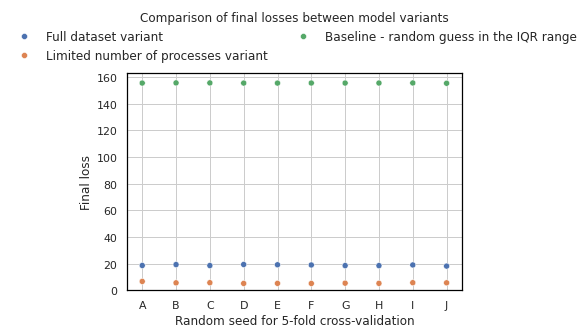

In [46]:
sns.set_style("whitegrid", rc=global_rcParams)

scatterplot = sns.scatterplot(data=vis_bw_errors_df, x="Random seed for 5-fold cross-validation", y="Final loss",
                              hue="Variant")
scatterplot.set_ylim(ymin=0)


scatterplot.spines.right.set(color="black")
scatterplot.spines.top.set(color="black")
scatterplot.spines.left.set(color="black")
scatterplot.spines.bottom.set(color="black")

sns.move_legend(scatterplot, "lower center", bbox_to_anchor=(.5, 1), ncol=2,
                title="Comparison of final losses between model variants", frameon=False)

Text(0, 0.5, 'Final error (MB/s)')

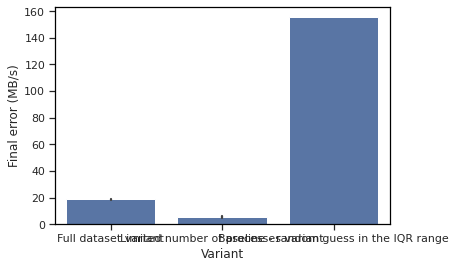

In [47]:
sns.set_style("ticks", rc=global_rcParams)
barplot = sns.barplot(data=vis_bw_errors_df, x="Variant", y="Final loss", errorbar="sd")

barplot.spines.right.set(color="black")
barplot.spines.top.set(color="black")
barplot.spines.left.set(color="black")
barplot.spines.bottom.set(color="black")

barplot.set_ylabel("Final error (MB/s)")

In [48]:
global_rcParams = {
    "font.size": "10",
    "legend.fontsize" : "10",
    "axes.titlesize":"10",
    "axes.labelsize" : "10"
}

In [49]:
plt.rcParams.update(global_rcParams)

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


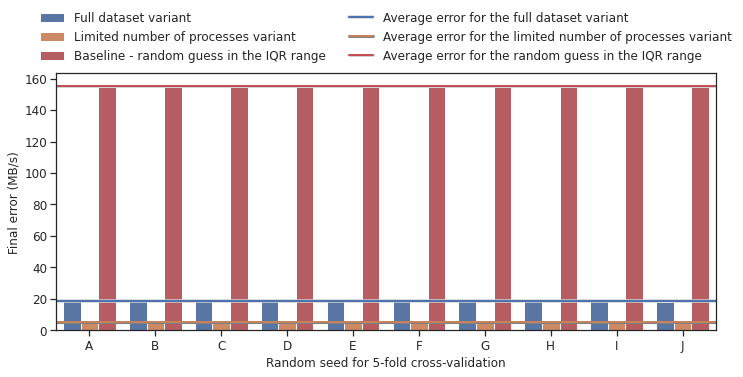

In [50]:
palette=["C0", "C1", "C3"]

sns.set_style("ticks", rc=global_rcParams)

# Only for the presentation, use Latex font for the thesis itself
# plt.rcParams["font.family"] = "DejaVu Sans"

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(30*cm, 12*cm))
sns.barplot(data=vis_bw_errors_df, x="Random seed for 5-fold cross-validation", y="Final loss", hue="Variant", palette=palette,
            ax=ax)

# Add the mean line
ax.axhline(y=vis_bw_errors_df.loc[vis_bw_errors_df["Variant"] == "Full dataset variant"]["Final loss"].mean(),
           color='C0',
           linewidth=2,
           label="Average error for the full dataset variant",
           path_effects=[path_effects.Stroke(linewidth=3.5, foreground="lightgray"),
                         path_effects.Normal()])

ax.axhline(
    y=vis_bw_errors_df.loc[vis_bw_errors_df["Variant"] == "Limited number of processes variant"]["Final loss"].mean(),
    color='C1',
    label="Average error for the limited number of processes variant",
    path_effects=[path_effects.Stroke(linewidth=3, foreground="gray"), path_effects.Normal()])


ax.axhline(
    y=vis_bw_errors_df.loc[vis_bw_errors_df["Variant"] == "Baseline - random guess in the IQR range"]["Final loss"].mean(),
    color='C3',
    linewidth=2,
    label="Average error for the random guess in the IQR range",
    path_effects=[path_effects.Stroke(linewidth=3, foreground="lightgray"), path_effects.Normal()])


ax.legend(ncol=2, loc="lower center", bbox_to_anchor=(.5, 1), frameon=False, fontsize=fontsize_val)

ax.set_xlabel("Random seed for 5-fold cross-validation", fontsize=fontsize_val)
ax.set_ylabel("Final error (MB/s)", fontsize=fontsize_val)
ax.set_yticklabels(ax.get_yticklabels(), size=fontsize_val)
ax.set_xticklabels(ax.get_xticklabels(), size=fontsize_val)


#fig.suptitle("Final error after training on Blue Waters dataset", y=1.1, fontsize=10)
plt.savefig("blue-waters-all.pdf", format="pdf", bbox_inches="tight")

In [51]:
vis_bw_errors_nrd_df = vis_bw_errors_df.loc[vis_bw_errors_df["Variant"] != 'Baseline - random guess in the IQR range']

The palette list has more values (3) than needed (2), which may not be intended.
set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


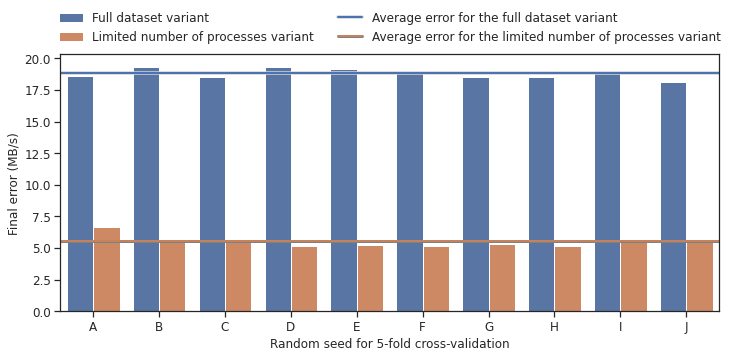

In [52]:
palette=["C0", "C1", "C3"]

sns.set_style("ticks", rc=global_rcParams)

# Only for the presentation, use Latex font for the thesis itself
# plt.rcParams["font.family"] = "DejaVu Sans"

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(30*cm, 12*cm))
sns.barplot(data=vis_bw_errors_nrd_df, x="Random seed for 5-fold cross-validation", y="Final loss", hue="Variant", palette=palette,
            ax=ax)

#Add the mean line
ax.axhline(y=vis_bw_errors_df.loc[vis_bw_errors_df["Variant"] == "Full dataset variant"]["Final loss"].mean(),
           color='C0',
           linewidth=2,
           label="Average error for the full dataset variant",
           path_effects=[path_effects.Stroke(linewidth=3.5, foreground="lightgray"),
                         path_effects.Normal()])

ax.axhline(
    y=vis_bw_errors_nrd_df.loc[vis_bw_errors_nrd_df["Variant"] == "Limited number of processes variant"]["Final loss"].mean(),
    color='C1',
    label="Average error for the limited number of processes variant",
    path_effects=[path_effects.Stroke(linewidth=3, foreground="gray"), path_effects.Normal()])


#ax.axhline(
#    y=vis_bw_errors_nrd_df.loc[vis_bw_errors_nrd_df["Variant"] == "Baseline - random guess in the IQR range"]["Final loss"].mean(),
#    color='C3',
#    linewidth=2,
#    label="Average error for the random guess in the IQR range",
#    path_effects=[path_effects.Stroke(linewidth=3, foreground="lightgray"), path_effects.Normal()])


ax.legend(ncol=2, loc="lower center", bbox_to_anchor=(.5, 1), frameon=False, fontsize=fontsize_val)

ax.set_xlabel("Random seed for 5-fold cross-validation", fontsize=fontsize_val)
ax.set_ylabel("Final error (MB/s)", fontsize=fontsize_val)
ax.set_yticklabels(ax.get_yticklabels(), size=fontsize_val)
ax.set_xticklabels(ax.get_xticklabels(), size=fontsize_val)


#fig.suptitle("Final error after training on Blue Waters dataset", y=1.1, fontsize=10)
plt.savefig("blue-waters-main.pdf", format="pdf", bbox_inches="tight")

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


Text(0.5, 1.035, 'Final error after training on Blue Waters dataset')

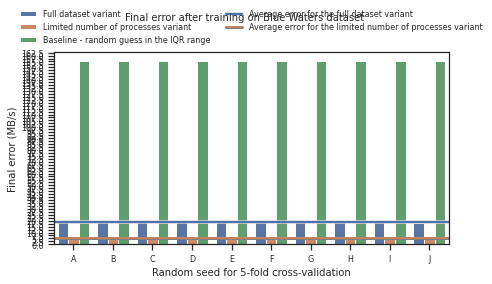

In [53]:
sns.set_style("ticks", rc=global_rcParams)

# Only for the presentation, use Latex font for the thesis itself
# plt.rcParams["font.family"] = "DejaVu Sans"

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(18*cm, 9*cm))
sns.barplot(data=vis_bw_errors_df, x="Random seed for 5-fold cross-validation", y="Final loss", hue="Variant",
            ax=ax)

# Add the mean line
ax.axhline(y=vis_bw_errors_df.loc[vis_bw_errors_df["Variant"] == "Full dataset variant"]["Final loss"].mean(),
           color='C0',
           linewidth=2,
           label="Average error for the full dataset variant",
           path_effects=[path_effects.Stroke(linewidth=3.5, foreground="lightgray"),
                         path_effects.Normal()])

ax.axhline(
    y=vis_bw_errors_df.loc[vis_bw_errors_df["Variant"] == "Limited number of processes variant"]["Final loss"].mean(),
    color='C1',
    # linewidth=2,
    label="Average error for the limited number of processes variant",
    path_effects=[path_effects.Stroke(linewidth=3, foreground="gray"), path_effects.Normal()])

ax.legend(ncol=2, loc="lower center", bbox_to_anchor=(.5, 1), frameon=False, fontsize=8)

ax.yaxis.set_major_locator(ticker.MultipleLocator(2.5))
ax.set_xlabel("Random seed for 5-fold cross-validation", fontsize=10)
ax.set_ylabel("Final error (MB/s)", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), size=8)
ax.set_xticklabels(ax.get_xticklabels(), size=8)


fig.suptitle("Final error after training on Blue Waters dataset", y=1.035, fontsize=10)

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


Text(0.5, 1.035, 'Final error after training on Blue Waters dataset')

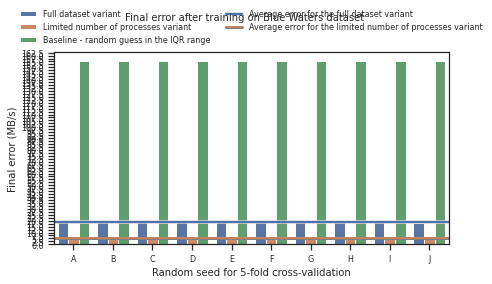

In [54]:
sns.set_style("ticks", rc=global_rcParams)

# Only for the presentation, use Latex font for the thesis itself
# plt.rcParams["font.family"] = "DejaVu Sans"

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(18*cm, 9*cm))
sns.barplot(data=vis_bw_errors_df, x="Random seed for 5-fold cross-validation", y="Final loss", hue="Variant",
            ax=ax)

# Add the mean line
ax.axhline(y=vis_bw_errors_df.loc[vis_bw_errors_df["Variant"] == "Full dataset variant"]["Final loss"].mean(),
           color='C0',
           linewidth=2,
           label="Average error for the full dataset variant",
           path_effects=[path_effects.Stroke(linewidth=3.5, foreground="lightgray"),
                         path_effects.Normal()])

ax.axhline(
    y=vis_bw_errors_df.loc[vis_bw_errors_df["Variant"] == "Limited number of processes variant"]["Final loss"].mean(),
    color='C1',
    # linewidth=2,
    label="Average error for the limited number of processes variant",
    path_effects=[path_effects.Stroke(linewidth=3, foreground="gray"), path_effects.Normal()])


ax.legend(ncol=2, loc="lower center", bbox_to_anchor=(.5, 1), frameon=False, fontsize=8)

ax.yaxis.set_major_locator(ticker.MultipleLocator(2.5))
ax.set_xlabel("Random seed for 5-fold cross-validation", fontsize=10)
ax.set_ylabel("Final error (MB/s)", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), size=8)
ax.set_xticklabels(ax.get_xticklabels(), size=8)


fig.suptitle("Final error after training on Blue Waters dataset", y=1.035, fontsize=10)

In [55]:
mean_error_limited_nprocs = vis_bw_errors_df.loc[vis_bw_errors_df["Variant"] == "Limited number of processes variant"]["Final loss"].mean()
mean_error_limited_nprocs

5.5300407493

In [56]:
mean_error_full = vis_bw_errors_df.loc[vis_bw_errors_df["Variant"] == "Full dataset variant"]["Final loss"].mean()
mean_error_full

18.8116568422

In [57]:
mean_error_full/mean_error_limited_nprocs

3.401721197910016

Text(17.200000000000003, 0.5, 'Final error (MB/s)')

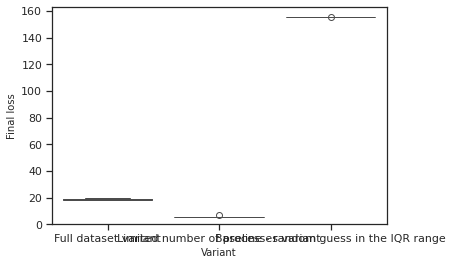

In [58]:
sns.set_style("ticks", rc=global_rcParams)
boxplot = sns.boxplot(data=vis_bw_errors_df, x="Variant", y="Final loss")
boxplot.set_ylim(ymin=0)

ax.set_ylabel("Final error (MB/s)")

### CLAIX Results

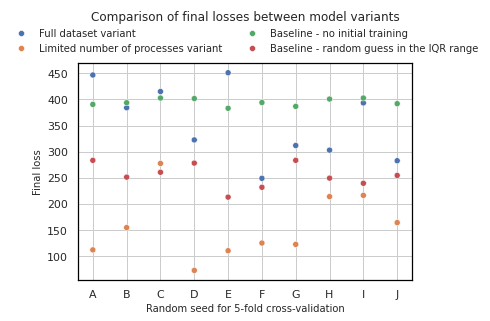

In [59]:
sns.set_style("whitegrid", rc=global_rcParams)
scatterplot = sns.scatterplot(data=vis_claix_combined_errors_df, x="Random seed for 5-fold cross-validation", y="Final loss",
                              hue="Variant")

scatterplot.spines.right.set(color="black")
scatterplot.spines.top.set(color="black")
scatterplot.spines.left.set(color="black")
scatterplot.spines.bottom.set(color="black")

sns.move_legend(scatterplot, "lower center", bbox_to_anchor=(.5, 1), ncol=2,
                title="Comparison of final losses between model variants", frameon=False)

Text(0, 0.5, 'Final error (MB/s)')

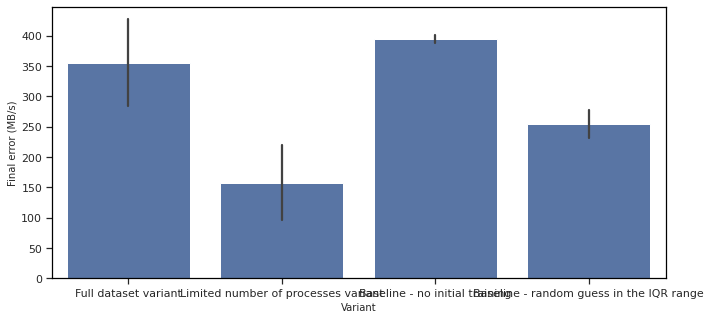

In [60]:
# Add a legend and informative axis label
sns.set_style("ticks", rc=global_rcParams)
fig, ax = plt.subplots(figsize=(11, 5))
barplot = sns.barplot(data=vis_claix_combined_errors_df, x="Variant", y="Final loss", errorbar="sd") # kind="bar

barplot.spines.right.set(color="black")
barplot.spines.top.set(color="black")
barplot.spines.left.set(color="black")
barplot.spines.bottom.set(color="black")

barplot.set_ylabel("Final error (MB/s)")

Text(0, 0.5, 'Final error (MB/s)')

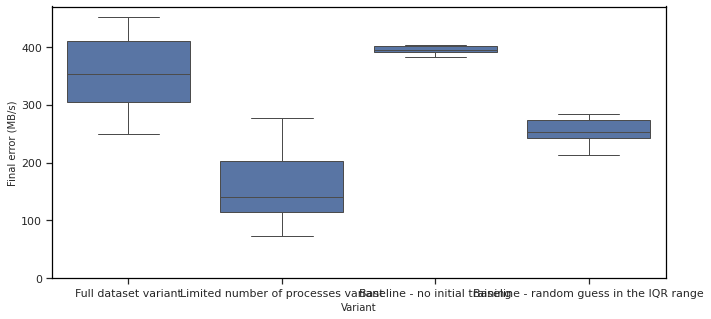

In [61]:
sns.set_style("ticks", rc=global_rcParams)

fig, ax = plt.subplots(figsize=(11, 5))
boxplot = sns.boxplot(data=vis_claix_combined_errors_df, x="Variant", y="Final loss")
boxplot.set_ylim(ymin=0)


boxplot.spines.right.set(color="black")
boxplot.spines.top.set(color="black")
boxplot.spines.left.set(color="black")
boxplot.spines.bottom.set(color="black")

boxplot.set_ylabel("Final error (MB/s)")

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


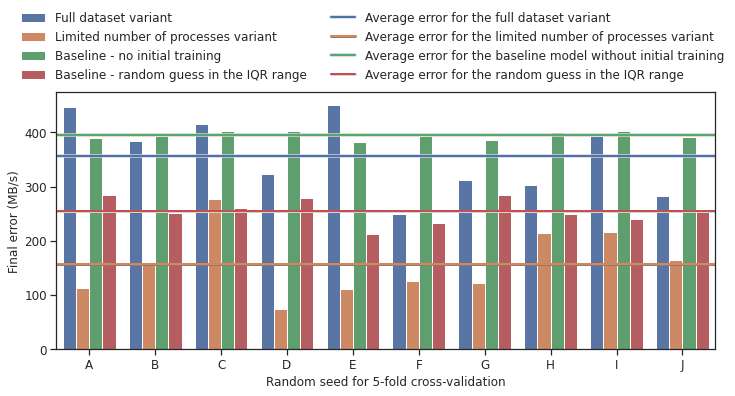

In [62]:
sns.set_style("ticks", rc=global_rcParams)

# plt.rcParams["font.family"] = "DejaVu Sans"

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(30*cm, 12*cm))
sns.barplot(data=vis_claix_combined_errors_df, x="Random seed for 5-fold cross-validation", y="Final loss", hue="Variant",
            ax=ax)

# Add the mean line
ax.axhline(y=vis_claix_combined_errors_df.loc[vis_claix_combined_errors_df["Variant"] == "Full dataset variant"]["Final loss"].mean(),
           color='C0',
           linewidth=2,
           label="Average error for the full dataset variant",
           path_effects=[path_effects.Stroke(linewidth=3.5, foreground="lightgray"),
                         path_effects.Normal()])

ax.axhline(
    y=vis_claix_combined_errors_df.loc[vis_claix_combined_errors_df["Variant"] == "Limited number of processes variant"]["Final loss"].mean(),
    color='C1',
    linewidth=2,
    label="Average error for the limited number of processes variant",
    path_effects=[path_effects.Stroke(linewidth=3, foreground="gray"), path_effects.Normal()])

ax.axhline(
    y=vis_claix_combined_errors_df.loc[vis_claix_combined_errors_df["Variant"] == "Baseline - no initial training"]["Final loss"].mean(),
    color='C2',
    linewidth=2,
    label="Average error for the baseline model without initial training",
    path_effects=[path_effects.Stroke(linewidth=3.5, foreground="lightgray"), path_effects.Normal()])

ax.axhline(
    y=vis_claix_combined_errors_df.loc[vis_claix_combined_errors_df["Variant"] == "Baseline - random guess in the IQR range"]["Final loss"].mean(),
    color='C3',
    linewidth=2,
    label="Average error for the random guess in the IQR range",
    path_effects=[path_effects.Stroke(linewidth=3, foreground="lightgray"), path_effects.Normal()])

ax.legend(ncol=2, loc="lower center", bbox_to_anchor=(.48, 1), frameon=False, fontsize=fontsize_val)

ax.tick_params(axis='both', which='major', labelsize=fontsize_val)

ax.set_ylabel("Final error (MB/s)" , fontsize=fontsize_val)
ax.set_xlabel("Random seed for 5-fold cross-validation", fontsize=fontsize_val)

ax.set_yticklabels(ax.get_yticklabels(), size=fontsize_val)
ax.set_xticklabels(ax.get_xticklabels(), size=fontsize_val)

#fig.suptitle("Final error after fine-tuning on CLAIX dataset", y=1.12, fontsize=10)
plt. savefig("transfer-learning-claix.pdf", format="pdf", bbox_inches="tight")

In [63]:
THETA_SCALED_MEAN = 10.28

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


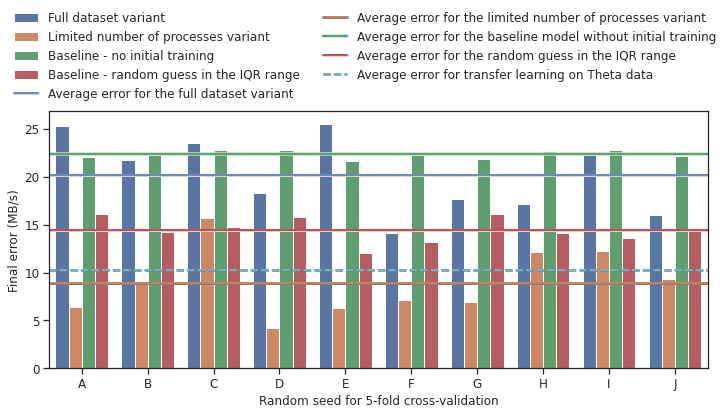

In [64]:
sns.set_style("ticks", rc=global_rcParams)

# plt.rcParams["font.family"] = "DejaVu Sans"

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(30*cm, 12*cm))
sns.barplot(data=vis_claix_combined_errors_df, x="Random seed for 5-fold cross-validation",
                       y="Final error (as % of bandwidth mean)", hue="Variant", ax=ax)

# Add the mean line
ax.axhline(y=vis_claix_combined_errors_df.loc[vis_claix_combined_errors_df["Variant"] == "Full dataset variant",
    "Final error (as % of bandwidth mean)"].mean(),
            color='C0',
            label="Average error for the full dataset variant",
            path_effects=[path_effects.Stroke(linewidth=3, foreground="lightgray"), path_effects.Normal()]
            )

ax.axhline(y=vis_claix_combined_errors_df.loc[vis_claix_combined_errors_df["Variant"] == "Limited number of processes variant",
    "Final error (as % of bandwidth mean)"].mean(),
            color='C1',
            label="Average error for the limited number of processes variant",
            path_effects=[path_effects.Stroke(linewidth=3, foreground="gray"), path_effects.Normal()]
            )

ax.axhline(
    y=vis_claix_combined_errors_df.loc[vis_claix_combined_errors_df["Variant"] == "Baseline - no initial training"]
                                                                                ["Final error (as % of bandwidth mean)"].mean(),
    color='C2',
    linewidth=2,
    label="Average error for the baseline model without initial training",
    path_effects=[path_effects.Stroke(linewidth=3.5, foreground="lightgray"), path_effects.Normal()])

ax.axhline(
    y=vis_claix_combined_errors_df.loc[vis_claix_combined_errors_df["Variant"] == "Baseline - random guess in the IQR range"]
                                                                                ["Final error (as % of bandwidth mean)"].mean(),
    color='C3',
    linewidth=2,
    label="Average error for the random guess in the IQR range",
    path_effects=[path_effects.Stroke(linewidth=3, foreground="lightgray"), path_effects.Normal()])

# Theta - preliminary results

ax.axhline(
    y=THETA_SCALED_MEAN,
    color= 'C9',
    linestyle='dashed',
    linewidth=2,
    label="Average error for transfer learning on Theta data",
    path_effects=[path_effects.Stroke(linewidth=2.5, foreground="gray"), path_effects.Normal()]
    )

ax.legend(ncol=2, loc="lower center", bbox_to_anchor=(.48, 1), frameon=False, fontsize=fontsize_val)

ax.tick_params(axis='both', which='major', labelsize=fontsize_val)

ax.set_ylabel("Final error (MB/s)" , fontsize=fontsize_val)
ax.set_xlabel("Random seed for 5-fold cross-validation", fontsize=fontsize_val)

ax.set_yticklabels(ax.get_yticklabels(), size=fontsize_val)
ax.set_xticklabels(ax.get_xticklabels(), size=fontsize_val)

#fig.suptitle("Final error after fine-tuning on CLAIX dataset", y=1.12, fontsize=10)
plt. savefig("transfer-learning-with-theta.pdf", format="pdf", bbox_inches="tight")

### Side by side comparison

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


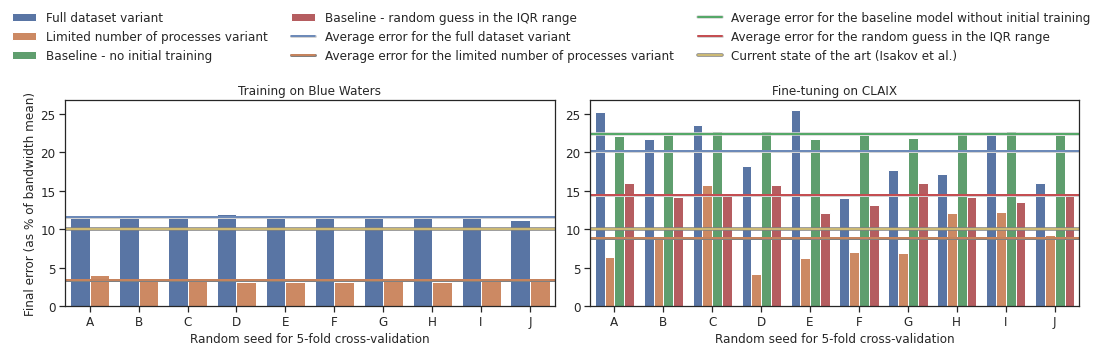

In [65]:
sns.set_style("ticks", rc=global_rcParams)

# plt.rcParams["font.family"] = "DejaVu Sans"
# sns.set_style("whitegrid")

fig, (ax1, ax2) = plt.subplots(figsize=(38*cm, 10*cm), ncols=2, sharey=True, width_ratios=[0.5, 0.5])

ax2.yaxis.set_tick_params(labelbottom=True)

# f, ax = plt.subplots(figsize=(6, 4))
barplot1 = sns.barplot(data=vis_bw_errors_nrd_df, x="Random seed for 5-fold cross-validation",
                       y="Final error (as % of bandwidth mean)", hue="Variant", ax=ax1)
barplot1.legend_.remove()

# Add the mean line
ax1.axhline(y=vis_bw_errors_df.loc[vis_bw_errors_df["Variant"] == "Full dataset variant",
    "Final error (as % of bandwidth mean)"].mean(),
            color='C0',
            label="Average error for the Full dataset variant",
            path_effects=[path_effects.Stroke(linewidth=3, foreground="lightgray"), path_effects.Normal()])

ax1.axhline(y=vis_bw_errors_df.loc[vis_bw_errors_df["Variant"] == "Limited number of processes variant",
    "Final error (as % of bandwidth mean)"].mean(),
            color='C1',
            label="Average error for the limited number of processes variant",
            path_effects=[path_effects.Stroke(linewidth=3, foreground="gray"), path_effects.Normal()]
            )

ax1.set_title("Training on Blue Waters", fontsize=fontsize_val)

barplot2 = sns.barplot(data=vis_claix_combined_errors_df, x="Random seed for 5-fold cross-validation",
                       y="Final error (as % of bandwidth mean)",
                       hue="Variant", ax=ax2)
barplot2.legend_.remove()

# Add the mean line
ax2.axhline(y=vis_claix_combined_errors_df.loc[vis_claix_combined_errors_df["Variant"] == "Full dataset variant",
    "Final error (as % of bandwidth mean)"].mean(),
            color='C0',
            label="Average error for the full dataset variant",
            path_effects=[path_effects.Stroke(linewidth=3, foreground="lightgray"), path_effects.Normal()]
            )

ax2.axhline(y=vis_claix_combined_errors_df.loc[vis_claix_combined_errors_df["Variant"] == "Limited number of processes variant",
    "Final error (as % of bandwidth mean)"].mean(),
            color='C1',
            label="Average error for the limited number of processes variant",
            path_effects=[path_effects.Stroke(linewidth=3, foreground="gray"), path_effects.Normal()]
            )

ax2.axhline(
    y=vis_claix_combined_errors_df.loc[vis_claix_combined_errors_df["Variant"] == "Baseline - no initial training"]
                                                                                ["Final error (as % of bandwidth mean)"].mean(),
    color='C2',
    linewidth=2,
    label="Average error for the baseline model without initial training",
    path_effects=[path_effects.Stroke(linewidth=3.5, foreground="lightgray"), path_effects.Normal()])

ax2.axhline(
    y=vis_claix_combined_errors_df.loc[vis_claix_combined_errors_df["Variant"] == "Baseline - random guess in the IQR range"]
                                                                                ["Final error (as % of bandwidth mean)"].mean(),
    color='C3',
    linewidth=2,
    label="Average error for the random guess in the IQR range",
    path_effects=[path_effects.Stroke(linewidth=3, foreground="lightgray"), path_effects.Normal()])

ax2.set_title("Fine-tuning on CLAIX", fontsize=fontsize_val)

# Add a line for the current state-of-the-art
ax1.axhline(
    y=10,
    color='C8',
    linewidth=2,
    # label="Current state of the art (Isakov et al.) [18]",
    label="Current state of the art (Isakov et al.)",
    path_effects=[path_effects.Stroke(linewidth=3.5, foreground="gray"), path_effects.Normal()])

ax2.axhline(
    y=10,
    color='C8',
    # linestyle='dashed',
    linewidth=2,
    # label="Current state of the art (Isakov et al.) [18]",
    label="Current state of the art (Isakov et al.)",
    path_effects=[path_effects.Stroke(linewidth=3.5, foreground="gray"), path_effects.Normal()])


ax1.tick_params(axis='both', which='major', labelsize=fontsize_val)

ax1.set_yticklabels(ax1.get_yticklabels(), size=fontsize_val)
ax1.set_xticklabels(ax1.get_xticklabels(), size=fontsize_val)

ax1.set_ylabel(ax1.get_ylabel() , fontsize=fontsize_val)
ax1.set_xlabel("Random seed for 5-fold cross-validation", fontsize=fontsize_val)


ax2.tick_params(axis='both', which='major', labelsize=fontsize_val)

ax2.set_yticklabels(ax2.get_yticklabels(), size=fontsize_val)
ax2.set_xticklabels(ax2.get_xticklabels(), size=fontsize_val)

ax2.set_ylabel("")
ax2.set_xlabel("Random seed for 5-fold cross-validation", fontsize=fontsize_val)

# Add a single legend for both plots
handles, labels = ax2.get_legend_handles_labels()

fig.legend(handles, labels, ncol=3, loc="lower center", bbox_to_anchor=(.5, 1), frameon=False, fontsize=fontsize_val)
#fig.suptitle("Final error across transfer learning stages and model variants", y=1.22, fontsize=12)

plt.tight_layout()
plt. savefig("side-by-side.pdf", format="pdf", bbox_inches="tight")

Text(0.5, 1.0, 'Comparison of final losses between model variants')

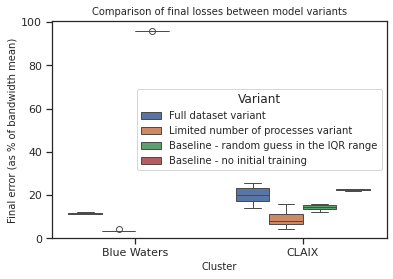

In [66]:
# For consistency, should keep to "blue = general model, orange = limited nprocs" convention. Otherwise confusing?

sns.set_style("ticks", rc=global_rcParams)
boxplot = sns.boxplot(data=vis_all_errors_df, x="Cluster", y="Final error (as % of bandwidth mean)",
                      hue="Variant")
boxplot.set_ylim(ymin=0)
boxplot.set_title("Comparison of final losses between model variants")

### THETA

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


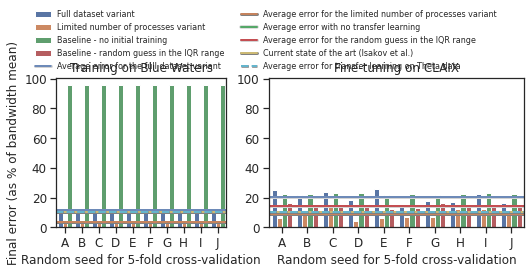

In [67]:
sns.set_style("ticks", rc=global_rcParams)

# plt.rcParams["font.family"] = "DejaVu Sans"
# sns.set_style("whitegrid")

fig, (ax1, ax2) = plt.subplots(figsize=(19*cm, 8*cm), ncols=2, sharey=True, width_ratios=[0.4, 0.6])
ax2.yaxis.set_tick_params(labelbottom=True)

barplot1 = sns.barplot(data=vis_bw_errors_df, x="Random seed for 5-fold cross-validation",
                       y="Final error (as % of bandwidth mean)", hue="Variant", ax=ax1)
barplot1.legend_.remove()

# Add the mean line
ax1.axhline(y=vis_bw_errors_df.loc[vis_bw_errors_df["Variant"] == "Full dataset variant",
    "Final error (as % of bandwidth mean)"].mean(),
            color='C0',
            label="Average error for the Full dataset variant",
            path_effects=[path_effects.Stroke(linewidth=3, foreground="lightgray"), path_effects.Normal()])

ax1.axhline(y=vis_bw_errors_df.loc[vis_bw_errors_df["Variant"] == "Limited number of processes variant",
    "Final error (as % of bandwidth mean)"].mean(),
            color='C1',
            label="Average error for the limited number of processes variant",
            path_effects=[path_effects.Stroke(linewidth=3, foreground="gray"), path_effects.Normal()]
            )

ax1.set_title("Training on Blue Waters", fontsize=fontsize_val)

barplot2 = sns.barplot(data=vis_claix_combined_errors_df, x="Random seed for 5-fold cross-validation",
                       y="Final error (as % of bandwidth mean)",
                       hue="Variant", ax=ax2)
barplot2.legend_.remove()

# Add the mean line
ax2.axhline(y=vis_claix_combined_errors_df.loc[vis_claix_combined_errors_df["Variant"] == "Full dataset variant",
    "Final error (as % of bandwidth mean)"].mean(),
            color='C0',
            label="Average error for the full dataset variant",
            path_effects=[path_effects.Stroke(linewidth=3, foreground="lightgray"), path_effects.Normal()]
            )

ax2.axhline(y=vis_claix_combined_errors_df.loc[vis_claix_combined_errors_df["Variant"] == "Limited number of processes variant",
    "Final error (as % of bandwidth mean)"].mean(),
            color='C1',
            label="Average error for the limited number of processes variant",
            path_effects=[path_effects.Stroke(linewidth=3, foreground="gray"), path_effects.Normal()]
            )

ax2.axhline(
    y=vis_claix_combined_errors_df.loc[vis_claix_combined_errors_df["Variant"] == "No transfer learning",
                              "Final error (as % of bandwidth mean)"].mean(),
    color='C2',
    linewidth=2,
    label="Average error with no transfer learning",
    path_effects=[path_effects.Stroke(linewidth=3.5, foreground="lightgray"), path_effects.Normal()])

ax2.set_title("Fine-tuning on CLAIX", fontsize=fontsize_val)


ax2.axhline(
    y=vis_claix_combined_errors_df.loc[vis_claix_combined_errors_df["Variant"] == "Baseline - random guess in the IQR range"]
                                                                                ["Final error (as % of bandwidth mean)"].mean(),
    color='C3',
    linewidth=2,
    label="Average error for the random guess in the IQR range",
    path_effects=[path_effects.Stroke(linewidth=3, foreground="lightgray"), path_effects.Normal()])

ax2.set_title("Fine-tuning on CLAIX", fontsize=fontsize_val)

# Add a line for the current state-of-the-art
ax1.axhline(
    y=10,
    color='C8',
    linewidth=2,
    # label="Current state of the art (Isakov et al.) [18]",
    label="Current state of the art (Isakov et al.)",
    path_effects=[path_effects.Stroke(linewidth=3, foreground="gray"), path_effects.Normal()])

ax2.axhline(
    y=10,
    color='C8',
    linewidth=2,
    # label="Current state of the art (Isakov et al.) [18]",
    label="Current state of the art (Isakov et al.)",
    path_effects=[path_effects.Stroke(linewidth=3, foreground="gray"), path_effects.Normal()])

# Theta - preliminary results

ax1.axhline(
    y=THETA_SCALED_MEAN,
    color= 'C9',
    linestyle='dashed',
    linewidth=2,
    label="Average error for transfer learning on Theta data",
    path_effects=[path_effects.Stroke(linewidth=2.5, foreground="gray"), path_effects.Normal()]
    )

ax2.axhline(
    y=THETA_SCALED_MEAN,
    color= 'C9',
    linestyle='dashed',
    linewidth=2,
    label="Average error for transfer learning on Theta data",
    path_effects=[path_effects.Stroke(linewidth=2.5, foreground="gray"), path_effects.Normal()]
    )

ax1.tick_params(axis='both', which='major', labelsize=fontsize_val)

ax1.set_yticklabels(ax1.get_yticklabels(), size=fontsize_val)
ax1.set_xticklabels(ax1.get_xticklabels(), size=fontsize_val)

ax1.set_ylabel(ax1.get_ylabel() , fontsize=fontsize_val)
ax1.set_xlabel("Random seed for 5-fold cross-validation", fontsize=fontsize_val)

ax2.tick_params(axis='both', which='major', labelsize=fontsize_val)

ax2.set_yticklabels(ax2.get_yticklabels(), size=fontsize_val)
ax2.set_xticklabels(ax2.get_xticklabels(), size=fontsize_val)

ax2.set_ylabel("")
ax2.set_xlabel("Random seed for 5-fold cross-validation", fontsize=fontsize_val)

# Add a single legend for both plots
handles, labels = ax2.get_legend_handles_labels()

fig.legend(handles, labels, ncol=2, loc="lower center", bbox_to_anchor=(.5, 0.88), frameon=False, fontsize=8)
#fig.suptitle("Preliminary final error with transfer learning on Theta data", y=1.22, fontsize=12)

plt.tight_layout()

# Cross Validation

In [68]:
CLAIX_BANDWIDTH_MEAN = 1764.640817
BW_BANDWIDTH_MEAN = 162.077947

In [69]:
FULL_DATASET_PATH = r"/work/qi190786/transfer-learning/2021-dmytro-povaliaiev/sourcecode/visualization/data/Feature_Attributions_Full_vs_Fine-tuned.csv"

FILTERED_NPROCS_DATASET_PATH = r"/work/qi190786/transfer-learning/2021-dmytro-povaliaiev/sourcecode/visualization/data/Feature_Attributions_Filtered_Nprocs_vs_Fine-tuned.csv"

In [70]:
full_dataset_df = pd.read_csv(FULL_DATASET_PATH, index_col=0)
len(full_dataset_df)

97

In [71]:
print(full_dataset_df)

                           avg_attribution_coeff_bw  relative_order_bw  \
POSIX_F_READ_TIME                          0.109016                1.0   
POSIX_F_META_TIME                          0.099567                2.0   
POSIX_TOTAL_TIME                           0.090075                3.0   
POSIX_F_SLOWEST_RANK_TIME                  0.029899                4.0   
POSIX_MAX_WRITE_TIME_SIZE                  0.020044                5.0   
...                                             ...                ...   
POSIX_SIZE_READ_100K_1M                   -0.007846               93.0   
POSIX_MODE                                -0.008326               94.0   
WRITE_10K_100K                            -0.008513               95.0   
READ_100K_1M                              -0.008534               96.0   
POSIX_MAX_READ_TIME_SIZE                  -0.014564               97.0   

                           feature_importance_rank_bw  \
POSIX_F_READ_TIME                                 1.0 

In [72]:
full_dataset_df.sort_values(by="feature_importance_rank_claix", ascending=True).head(14)

,avg_attribution_coeff_bw,relative_order_bw,feature_importance_rank_bw,avg_attribution_coeff_claix,relative_order_claix,feature_importance_rank_claix
POSIX_F_META_TIME,0.099567,2.0,2.0,0.119014,1.0,1.0
POSIX_F_READ_TIME,0.109016,1.0,1.0,0.117055,2.0,2.0
POSIX_TOTAL_TIME,0.090075,3.0,3.0,0.092607,3.0,3.0
POSIX_F_SLOWEST_RANK_TIME,0.029899,4.0,4.0,0.035994,4.0,4.0
POSIX_F_MAX_READ_TIME,0.017018,6.0,6.0,0.018275,5.0,5.0
POSIX_MAX_WRITE_TIME_SIZE,0.020044,5.0,5.0,0.018258,6.0,6.0
POSIX_ACCESS2_ACCESS,0.015462,7.0,7.0,0.014359,7.0,7.0
POSIX_MAX_READ_TIME_SIZE,-0.014564,97.0,8.0,-0.013705,97.0,8.0
nprocs,0.012763,8.0,9.0,0.011586,8.0,9.0
POSIX_SLOWEST_RANK_BYTES,0.011569,10.0,11.0,0.011300,9.0,10.0


In [73]:
FULL_FEATURES_PATH = r"/work/qi190786/transfer-learning/2021-dmytro-povaliaiev/sourcecode/visualization/data/importance-transfers-coefficient-full.csv"

FILTERED_FEATURES_PATH = r"/work/qi190786/transfer-learning/2021-dmytro-povaliaiev/sourcecode/visualization/data/importance-transfers-coefficient.csv"

In [74]:
full_features_df = pd.read_csv(FULL_FEATURES_PATH, index_col=False,sep=";")
full_features_df

,Feature,Value,Cluster
0,READ_TIME,0.109016,Blue Waters
1,META_TIME,0.099567,Blue Waters
2,TOTAL_TIME,0.090075,Blue Waters
3,SLOWEST_RANK_TIME,0.029899,Blue Waters
4,MAX_WRITE_TIME_SIZE,0.020044,Blue Waters
5,MAX_READ_TIME,0.017018,Blue Waters
6,ACCESS2_ACCESS,0.015462,Blue Waters
7,nprocs,0.012763,Blue Waters
8,ACCESS1_ACCESS,0.012718,Blue Waters
9,SLOWEST_RANK_BYTES,0.011569,Blue Waters


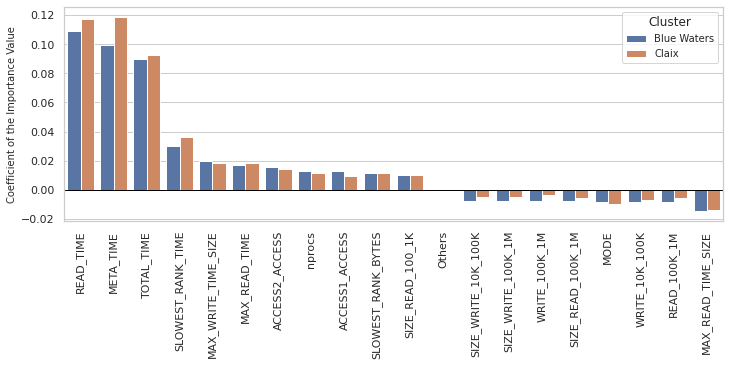

In [75]:
sns.set_style("whitegrid", rc=global_rcParams)
fig, ax = plt.subplots(figsize=(30*cm, 10*cm))
sns.barplot(data=full_features_df, x="Feature",
                       y="Value", hue="Cluster", ax=ax)
ax.set(xlabel="", ylabel="Coefficient of the Importance Value")
ax.axhline(
    y=0,
    color='black',
    linewidth=1
    )
plt.xticks(rotation=90)
plt. savefig("features-importance-all.pdf", format="pdf", bbox_inches="tight")

In [76]:
filtered_features_df = pd.read_csv(FILTERED_FEATURES_PATH, index_col=False,sep=";")
filtered_features_df

,Feature,Value,Cluster
0,READ_TIME,0.241142,Blue Waters
1,TOTAL_TIME,0.104137,Blue Waters
2,WRITE_TIME,0.092017,Blue Waters
3,META_TIME,0.069713,Blue Waters
4,ACCESS2_ACCESS,0.010361,Blue Waters
5,SLOWEST_RANK_TIME,0.010032,Blue Waters
6,MAX_WRITE_TIME,0.009443,Blue Waters
7,MAX_READ_TIME,0.007053,Blue Waters
8,READ_100_1K,0.005458,Blue Waters
9,SIZE_READ_100_1K,0.005384,Blue Waters


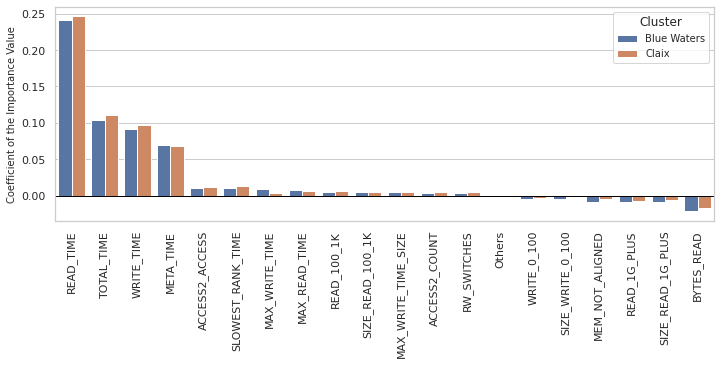

In [77]:
sns.set_style("whitegrid", rc=global_rcParams)
fig, ax = plt.subplots(figsize=(30*cm, 10*cm))
sns.barplot(data=filtered_features_df, x="Feature",
                       y="Value", hue="Cluster", ax=ax)
ax.set(xlabel="", ylabel="Coefficient of the Importance Value")
ax.axhline(
    y=0,
    color='black',
    linewidth=1
    )
plt.xticks(rotation=90)
plt. savefig("features-importance-filtered.pdf", format="pdf", bbox_inches="tight")

In [78]:
s = full_dataset_df.sort_values(by="feature_importance_rank_claix", ascending=True)
s.loc[s["feature_importance_rank_claix"] > 13, "avg_attribution_coeff_claix"].sum()

0.060747538289461674

In [79]:
full_dataset_df["avg_attribution_coeff_claix"].sum()

0.5157099732156961

In [80]:
full_dataset_df["avg_attribution_coeff_claix"].abs().sum()

0.7011298345898489

In [81]:
filtered_nprocs_df = pd.read_csv(FILTERED_NPROCS_DATASET_PATH, index_col=0)
len(filtered_nprocs_df)

97

In [82]:
filtered_nprocs_df.sort_values(by="feature_importance_rank_claix", ascending=True).head(14)

,avg_attribution_coeff_bw,relative_order_bw,feature_importance_rank_bw,avg_attribution_coeff_claix,relative_order_claix,feature_importance_rank_claix
POSIX_F_READ_TIME,0.241142,1.0,1.0,0.246626,1.0,1.0
POSIX_TOTAL_TIME,0.104137,2.0,2.0,0.110199,2.0,2.0
POSIX_F_WRITE_TIME,0.092017,3.0,3.0,0.096342,3.0,3.0
POSIX_F_META_TIME,0.069713,4.0,4.0,0.068759,4.0,4.0
POSIX_BYTES_READ,-0.021065,97.0,5.0,-0.017711,97.0,5.0
POSIX_F_SLOWEST_RANK_TIME,0.010032,6.0,7.0,0.012618,5.0,6.0
POSIX_ACCESS2_ACCESS,0.010361,5.0,6.0,0.011412,6.0,7.0
READ_1G_PLUS,-0.009140,95.0,10.0,-0.007429,96.0,8.0
POSIX_SIZE_READ_1G_PLUS,-0.009203,96.0,9.0,-0.006814,95.0,9.0
POSIX_F_MAX_READ_TIME,0.007053,8.0,12.0,0.006425,7.0,10.0


In [83]:
filtered_nprocs_df["avg_attribution_coeff_claix"].sum()

0.5944840580914901

In [84]:
filtered_nprocs_df["avg_attribution_coeff_claix"].abs().sum()

0.7372488584602178

## Waterfall visualization

In [85]:
full_dataset_df["display_feature_names"] = full_dataset_df.index
full_dataset_df["display_feature_names"] = full_dataset_df["display_feature_names"].str.replace("POSIX_F_", "")
full_dataset_df["display_feature_names"] = full_dataset_df["display_feature_names"].str.replace("POSIX_", "")
full_dataset_df

,avg_attribution_coeff_bw,relative_order_bw,feature_importance_rank_bw,avg_attribution_coeff_claix,relative_order_claix,feature_importance_rank_claix,display_feature_names
POSIX_F_READ_TIME,0.109016,1.0,1.0,0.117055,2.0,2.0,READ_TIME
POSIX_F_META_TIME,0.099567,2.0,2.0,0.119014,1.0,1.0,META_TIME
POSIX_TOTAL_TIME,0.090075,3.0,3.0,0.092607,3.0,3.0,TOTAL_TIME
POSIX_F_SLOWEST_RANK_TIME,0.029899,4.0,4.0,0.035994,4.0,4.0,SLOWEST_RANK_TIME
POSIX_MAX_WRITE_TIME_SIZE,0.020044,5.0,5.0,0.018258,6.0,6.0,MAX_WRITE_TIME_SIZE
...,...,...,...,...,...,...,...
POSIX_SIZE_READ_100K_1M,-0.007846,93.0,19.0,-0.005488,93.0,24.0,SIZE_READ_100K_1M
POSIX_MODE,-0.008326,94.0,18.0,-0.009397,96.0,14.0,MODE
WRITE_10K_100K,-0.008513,95.0,16.0,-0.006823,95.0,20.0,WRITE_10K_100K
READ_100K_1M,-0.008534,96.0,15.0,-0.005396,92.0,25.0,READ_100K_1M


In [86]:
full_expl = shap.Explanation(values=full_dataset_df["avg_attribution_coeff_claix"], feature_names=full_dataset_df["display_feature_names"], base_values=0)
full_expl

.values =
POSIX_F_READ_TIME            0.117055
POSIX_F_META_TIME            0.119014
POSIX_TOTAL_TIME             0.092607
POSIX_F_SLOWEST_RANK_TIME    0.035994
POSIX_MAX_WRITE_TIME_SIZE    0.018258
                               ...   
POSIX_SIZE_READ_100K_1M     -0.005488
POSIX_MODE                  -0.009397
WRITE_10K_100K              -0.006823
READ_100K_1M                -0.005396
POSIX_MAX_READ_TIME_SIZE    -0.013705
Name: avg_attribution_coeff_claix, Length: 97, dtype: float64

.base_values =
0

In [87]:
filtered_nprocs_df["display_feature_names"] = filtered_nprocs_df.index
filtered_nprocs_df["display_feature_names"] = filtered_nprocs_df["display_feature_names"].str.replace("POSIX_F_", "")
filtered_nprocs_df["display_feature_names"] = filtered_nprocs_df["display_feature_names"].str.replace("POSIX_", "")
filtered_nprocs_df

,avg_attribution_coeff_bw,relative_order_bw,feature_importance_rank_bw,avg_attribution_coeff_claix,relative_order_claix,feature_importance_rank_claix,display_feature_names
POSIX_F_READ_TIME,0.241142,1.0,1.0,0.246626,1.0,1.0,READ_TIME
POSIX_TOTAL_TIME,0.104137,2.0,2.0,0.110199,2.0,2.0,TOTAL_TIME
POSIX_F_WRITE_TIME,0.092017,3.0,3.0,0.096342,3.0,3.0,WRITE_TIME
POSIX_F_META_TIME,0.069713,4.0,4.0,0.068759,4.0,4.0,META_TIME
POSIX_ACCESS2_ACCESS,0.010361,5.0,6.0,0.011412,6.0,7.0,ACCESS2_ACCESS
...,...,...,...,...,...,...,...
POSIX_SIZE_WRITE_0_100,-0.004580,93.0,16.0,-0.002226,87.0,38.0,SIZE_WRITE_0_100
POSIX_MEM_NOT_ALIGNED,-0.008242,94.0,11.0,-0.005309,94.0,13.0,MEM_NOT_ALIGNED
READ_1G_PLUS,-0.009140,95.0,10.0,-0.007429,96.0,8.0,READ_1G_PLUS
POSIX_SIZE_READ_1G_PLUS,-0.009203,96.0,9.0,-0.006814,95.0,9.0,SIZE_READ_1G_PLUS


In [88]:
filtered_nprocs_expl = shap.Explanation(values=filtered_nprocs_df["avg_attribution_coeff_claix"], feature_names=filtered_nprocs_df["display_feature_names"], base_values=0)
filtered_nprocs_expl

.values =
POSIX_F_READ_TIME          0.246626
POSIX_TOTAL_TIME           0.110199
POSIX_F_WRITE_TIME         0.096342
POSIX_F_META_TIME          0.068759
POSIX_ACCESS2_ACCESS       0.011412
                             ...   
POSIX_SIZE_WRITE_0_100    -0.002226
POSIX_MEM_NOT_ALIGNED     -0.005309
READ_1G_PLUS              -0.007429
POSIX_SIZE_READ_1G_PLUS   -0.006814
POSIX_BYTES_READ          -0.017711
Name: avg_attribution_coeff_claix, Length: 97, dtype: float64

.base_values =
0

### Visualization - full dataset

In [89]:
plt.rcParams["figure.figsize"]

[6.0, 4.0]

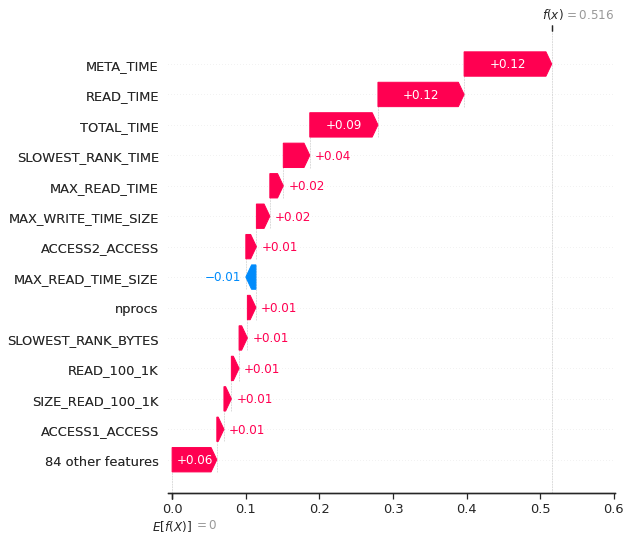

In [99]:
sns.set_style("ticks", rc=global_rcParams)
plt.figure(figsize=(30*cm,10*cm))
waterfall = shap.plots.waterfall(full_expl, max_display=14, show=False)
plt.savefig("waterfall-all.pdf", format="pdf", bbox_inches="tight")

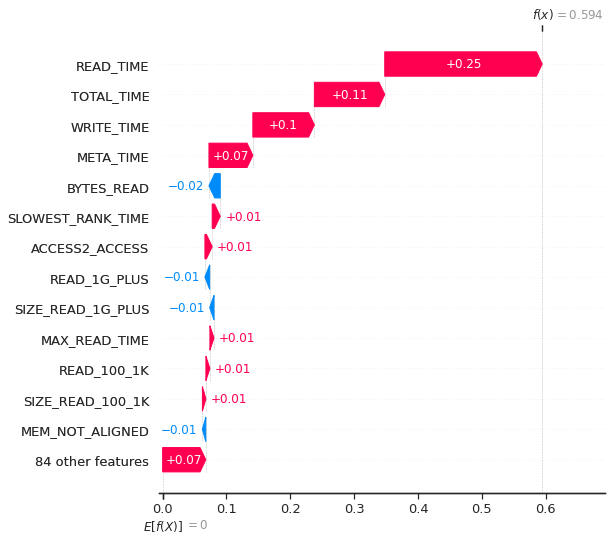

In [95]:
# filtered num of procs
sns.set_style("ticks", rc=global_rcParams)
shap.plots.waterfall(filtered_nprocs_expl, max_display=14)